 # The following ML model tries to predict the survivability of lung cancer using information like the current stage the patient is at, their smoking status, if there were any family members that had cancer, if they had asthma, the treatment type they had and if they had any other type of cancer before.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data  = pd.read_csv('lung_cancer_mortality_data_small.csv')
data.head()


,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Croatia,2016-04-05,Stage I,Yes,Current Smoker,27.3,196,0,1,0,0,Radiation,2018-01-09,0
1,2,50.0,Female,Italy,2023-04-20,Stage III,No,Passive Smoker,22.4,234,1,1,1,0,Chemotherapy,2023-11-28,0
2,3,65.0,Male,Slovakia,2023-04-05,Stage IV,No,Former Smoker,20.2,210,0,0,0,0,Chemotherapy,2025-01-12,0
3,4,51.0,Female,Greece,2016-02-05,Stage III,Yes,Never Smoked,41.8,262,1,0,1,0,Surgery,2016-11-14,0
4,5,37.0,Female,Slovakia,2023-11-29,Stage III,Yes,Passive Smoker,33.5,262,0,0,0,0,Chemotherapy,2025-03-10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  56000 non-null  int64  
 1   age                 56000 non-null  float64
 2   gender              56000 non-null  object 
 3   country             56000 non-null  object 
 4   diagnosis_date      56000 non-null  object 
 5   cancer_stage        56000 non-null  object 
 6   family_history      56000 non-null  object 
 7   smoking_status      56000 non-null  object 
 8   bmi                 56000 non-null  float64
 9   cholesterol_level   56000 non-null  int64  
 10  hypertension        56000 non-null  int64  
 11  asthma              56000 non-null  int64  
 12  cirrhosis           56000 non-null  int64  
 13  other_cancer        56000 non-null  int64  
 14  treatment_type      56000 non-null  object 
 15  end_treatment_date  56000 non-null  object 
 16  surv

In [4]:
data.isnull().sum()

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

In [5]:
def change(x):
    if x =='Stage I':
        return 1
    elif x =='Stage II':
        return 2
    elif x =='Stage III':
        return 3
    elif x =='Stage IV':
        return 4
    

In [6]:
data['cancer_stage'] = data['cancer_stage'].apply(change)

In [7]:
data['cancer_stage']

0        1
1        3
2        4
3        3
4        3
        ..
55995    3
55996    4
55997    2
55998    3
55999    1
Name: cancer_stage, Length: 56000, dtype: int64

In [8]:
def smoker(x):
    if x =='Never Smoked':
        return 0
    elif x =='Former Smoker':
        return 1
    elif x =='Passive Smoker':
        return 2
    else:
        return 3
data['smoking_status'] = data['smoking_status'].apply(smoker)

In [9]:
data['smoking_status']

0        3
1        2
2        1
3        0
4        2
        ..
55995    0
55996    3
55997    2
55998    1
55999    2
Name: smoking_status, Length: 56000, dtype: int64

In [10]:
def history(x):
    if x =='Yes':
        return 1
    else:
        return 2
data['family_history'] = data['family_history'].apply(history)



In [11]:
data['family_history']

0        1
1        2
2        2
3        1
4        1
        ..
55995    1
55996    1
55997    1
55998    2
55999    1
Name: family_history, Length: 56000, dtype: int64

In [12]:
def treatment(x):
    if x =='Chemotherapy':
        return 1
    elif x =='Radiation':
        return 2
    elif x =='Surgery':
        return 3
    else:
        return 4
    


In [13]:
data['treatment_type'] = data['treatment_type'].apply(treatment)

In [14]:
data['treatment_type'] 

0        2
1        1
2        1
3        3
4        1
        ..
55995    3
55996    4
55997    2
55998    2
55999    2
Name: treatment_type, Length: 56000, dtype: int64

In [15]:
data = data.drop(['id'], axis = 1)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 56000 non-null  float64
 1   gender              56000 non-null  object 
 2   country             56000 non-null  object 
 3   diagnosis_date      56000 non-null  object 
 4   cancer_stage        56000 non-null  int64  
 5   family_history      56000 non-null  int64  
 6   smoking_status      56000 non-null  int64  
 7   bmi                 56000 non-null  float64
 8   cholesterol_level   56000 non-null  int64  
 9   hypertension        56000 non-null  int64  
 10  asthma              56000 non-null  int64  
 11  cirrhosis           56000 non-null  int64  
 12  other_cancer        56000 non-null  int64  
 13  treatment_type      56000 non-null  int64  
 14  end_treatment_date  56000 non-null  object 
 15  survived            56000 non-null  int64  
dtypes: f

In [17]:
colheaders = data.columns.values
colheaders

array(['age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer',
       'treatment_type', 'end_treatment_date', 'survived'], dtype=object)

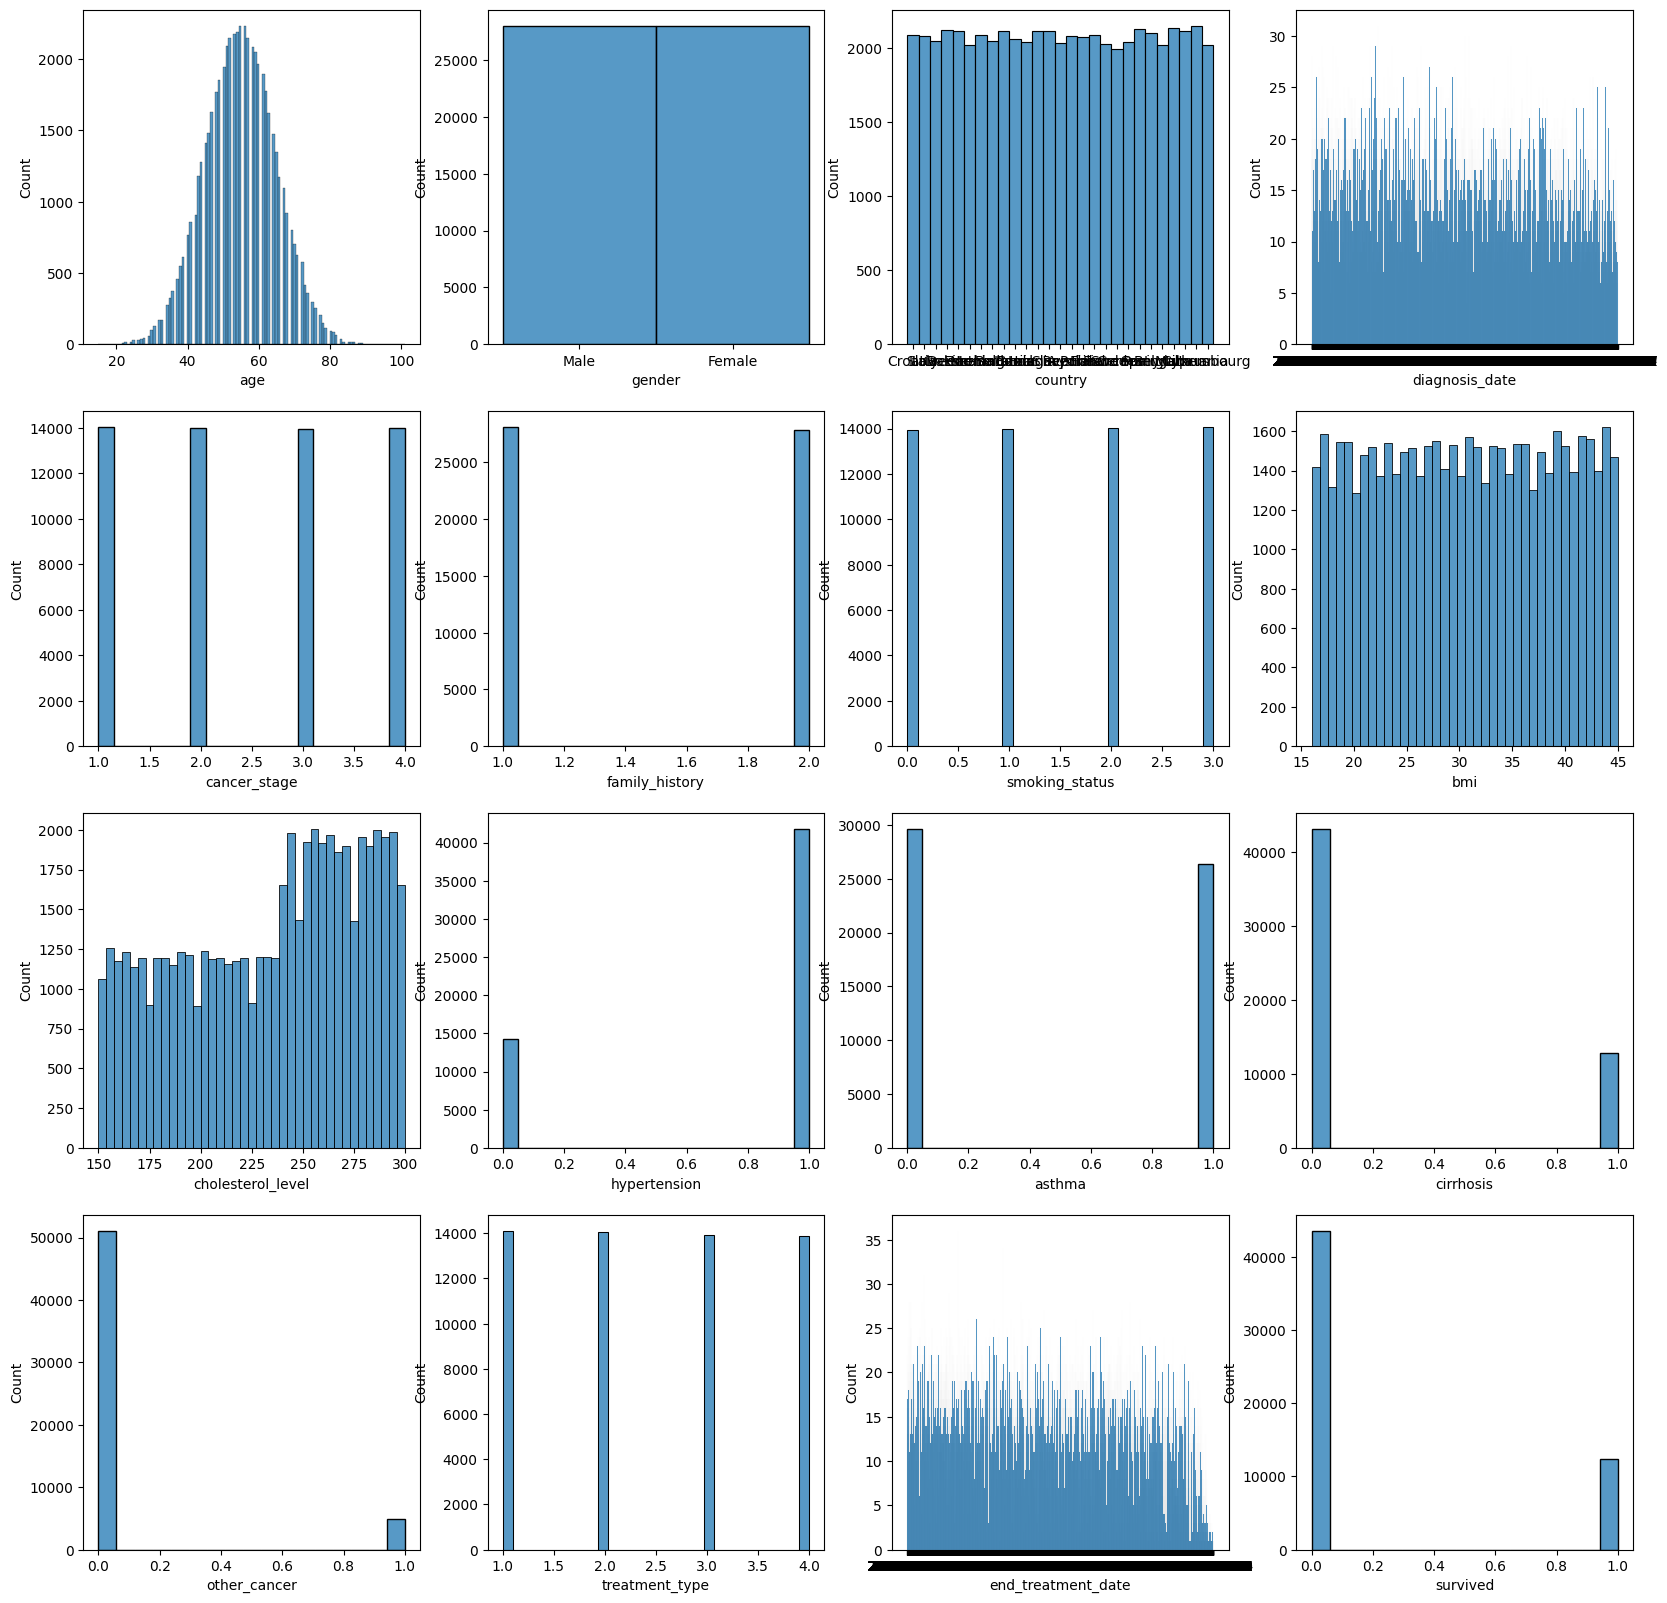

In [18]:
i = 1
fig, ax = plt.subplots(4,4, figsize = (20,20))

for col in colheaders:
    plt.subplot(4,4,i)
    sns.histplot(data=data[col])
    i = i+1



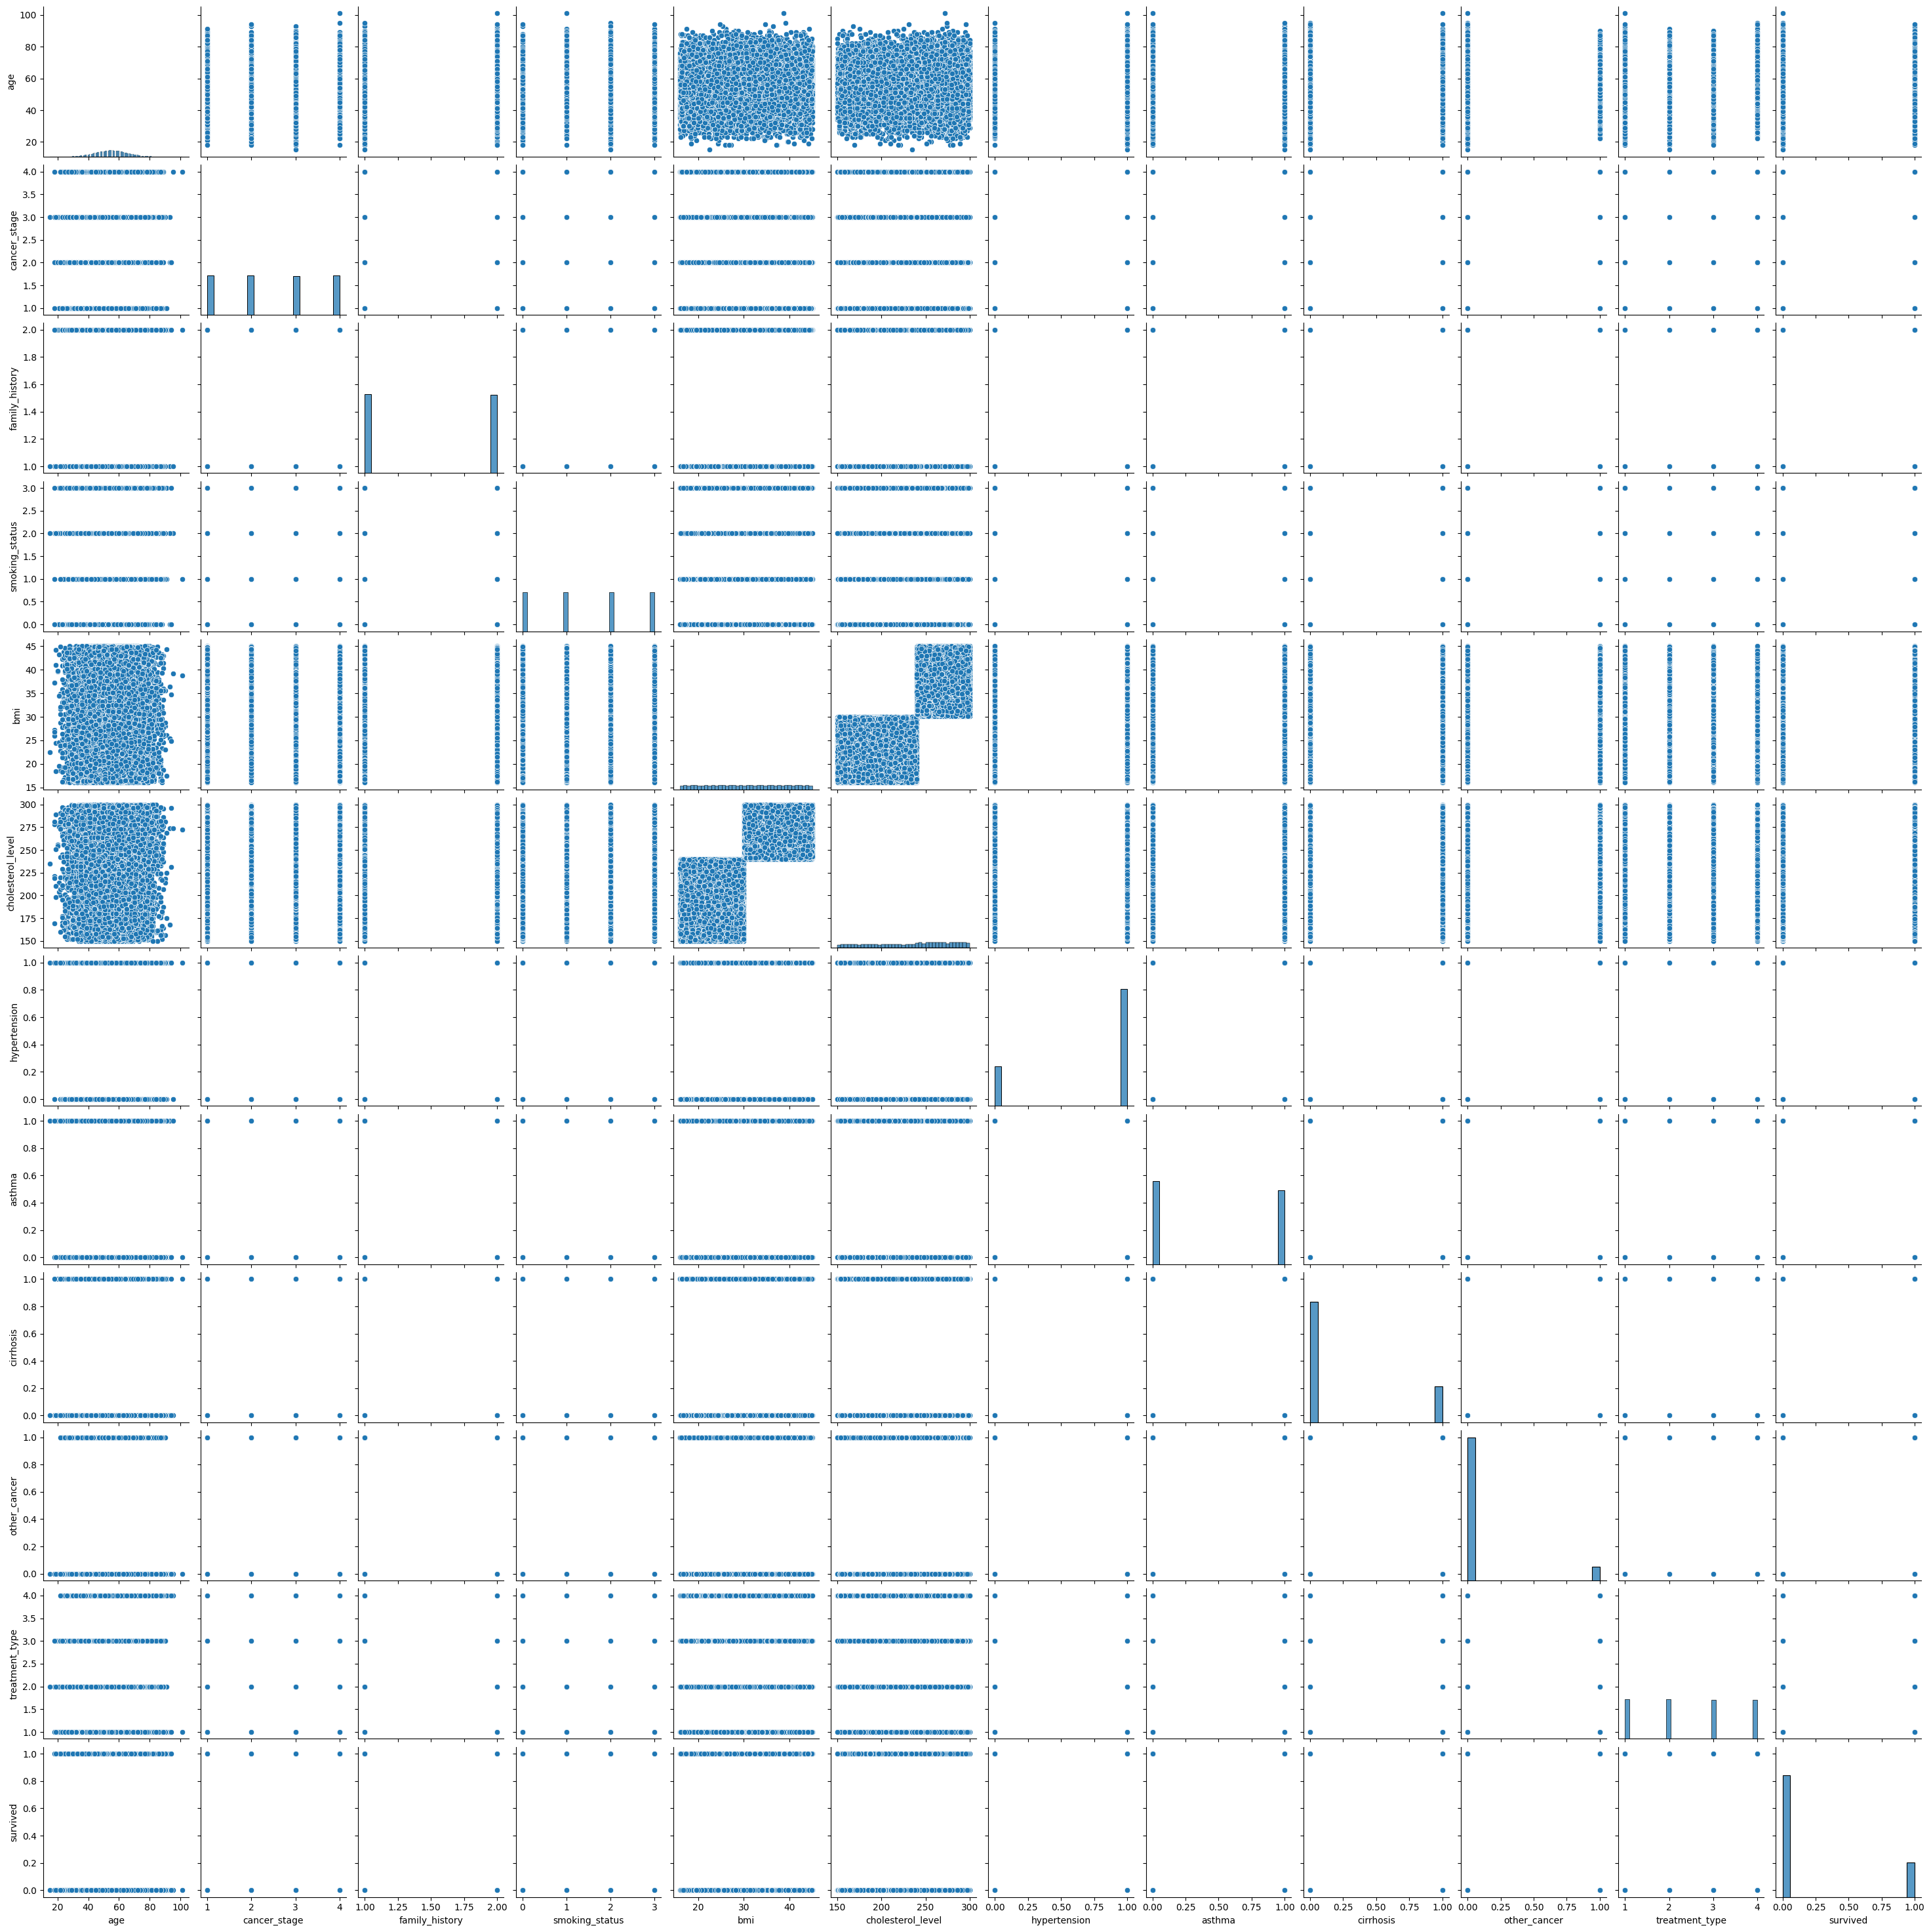

In [19]:
sns.pairplot(data=data)

<Axes: >

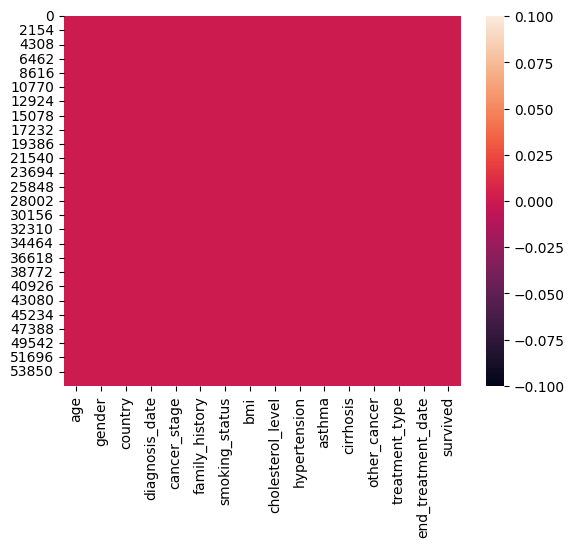

In [20]:
sns.heatmap(data.isna())

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 56000 non-null  float64
 1   gender              56000 non-null  object 
 2   country             56000 non-null  object 
 3   diagnosis_date      56000 non-null  object 
 4   cancer_stage        56000 non-null  int64  
 5   family_history      56000 non-null  int64  
 6   smoking_status      56000 non-null  int64  
 7   bmi                 56000 non-null  float64
 8   cholesterol_level   56000 non-null  int64  
 9   hypertension        56000 non-null  int64  
 10  asthma              56000 non-null  int64  
 11  cirrhosis           56000 non-null  int64  
 12  other_cancer        56000 non-null  int64  
 13  treatment_type      56000 non-null  int64  
 14  end_treatment_date  56000 non-null  object 
 15  survived            56000 non-null  int64  
dtypes: f

In [22]:
x = data[['cancer_stage', 'smoking_status', 'family_history','asthma','treatment_type', 'other_cancer']]
x

,cancer_stage,smoking_status,family_history,asthma,treatment_type,other_cancer
0,1,3,1,1,2,0
1,3,2,2,1,1,0
2,4,1,2,0,1,0
3,3,0,1,0,3,0
4,3,2,1,0,1,0
...,...,...,...,...,...,...
55995,3,0,1,0,3,0
55996,4,3,1,0,4,0
55997,2,2,1,0,2,0
55998,3,1,2,0,2,0


In [23]:
y = data['survived']

In [24]:
y

0        0
1        0
2        0
3        0
4        0
        ..
55995    0
55996    0
55997    1
55998    0
55999    0
Name: survived, Length: 56000, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [27]:
x_train

,cancer_stage,smoking_status,family_history,asthma,treatment_type,other_cancer
32480,2,1,1,0,2,1
50491,2,1,2,0,2,0
1601,2,2,2,0,4,0
11059,1,2,1,0,3,0
15975,4,2,1,0,2,0
...,...,...,...,...,...,...
14096,1,1,2,0,1,0
34737,3,0,2,1,4,1
42572,3,0,2,0,4,0
28135,3,3,1,0,3,0


In [28]:
y_train

32480    0
50491    0
1601     0
11059    0
15975    1
        ..
14096    0
34737    0
42572    0
28135    0
54956    0
Name: survived, Length: 44800, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
regressor  = LinearRegression(fit_intercept=True)
regressor.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

In [64]:
print('coeff M', regressor.coef_)
print('Coeff b', regressor.intercept_)

coeff M [-1.33825337e-05  2.77138526e-03 -6.67304593e-03 -8.20785779e-04
 -2.36531879e-03  1.20067624e-03]
Coeff b 0.0


In [65]:
ypre = regressor.predict(x_test)

In [66]:
ypre

array([ 0.01154207,  0.00895999,  0.01142518, ..., -0.00896708,
        0.00934536, -0.00685644])

In [67]:

for i in range(len(ypre)):
    if ypre[i] > 0.5:
        ypre[i] = 1
    else:
        ypre[i] = 0 
        

In [68]:
y_test

9410     0
24293    1
39119    0
42259    1
21007    0
        ..
12432    1
3809     0
19273    0
1573     0
52748    1
Name: survived, Length: 8960, dtype: int64

In [69]:
ypre

array([0., 0., 0., ..., 0., 0., 0.])

In [70]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt


In [71]:
k = x_test.shape[1]
n = len(x_test)

In [38]:
k



6

In [72]:
n

8960

In [73]:
rmse = float(format(np.sqrt(mean_squared_error(y_test, ypre)), '.3f'))
mse = mean_squared_error(y_test, ypre)
mae = mean_absolute_error(y_test, ypre)
r2 = r2_score(y_test, ypre)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)


print('\nrmse = ', rmse, '\n mse = ', mse , '\n mae = ', mae , ' \nr2 = ', r2, '\n adjusted r2 = ',adj_r2)




rmse =  0.475 
 mse =  0.2255580357142857 
 mae =  0.2255580357142857  
r2 =  -0.29125234183599935 
 adjusted r2 =  -0.2921176958012641


In [41]:
data.loc[52997]

age                         57.0
gender                    Female
country                  Romania
diagnosis_date        2015-07-16
cancer_stage                   4
family_history                 2
smoking_status                 1
bmi                         21.6
cholesterol_level            233
hypertension                   0
asthma                         1
cirrhosis                      0
other_cancer                   0
treatment_type                 4
end_treatment_date    2016-05-05
survived                       0
Name: 52997, dtype: object

In [42]:
# x = [['cancer_stage', 'smoking_status', 'family_history','asthma','treatment_type', 'other_cancer']]

x = [[4, 1, 2, 1, 4,0]]
y = regressor.predict(x)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:

if y< 0.5:
    print(0)
else:
    print( 1) 

0


In [49]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Polynomial Features (if using a linear model)
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)  # Adds polynomial terms to x

# Feature Scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)  # Scales the features


In [50]:

y_train.shape

(44800,)

In [51]:
x_scaled.shape


(44800, 6)

In [52]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets after transformations
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_train, test_size=0.2, random_state=42)


In [74]:
from sklearn.linear_model import LinearRegression
regressor  = LinearRegression(fit_intercept=True)
regressor.fit(x_train, y_train)

LinearRegression()

In [77]:
y_pre = regressor.predict(x_test)

In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Choose the model predictions you wish to evaluate (e.g., y_pred_rf or y_pred_best_rf)
mse = mean_squared_error(y_test, y_pre )
mae = mean_absolute_error(y_test, y_pre)
r2 = r2_score(y_test, y_pre)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pre)), '.3f'))
print(rmse)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


0.418
Mean Squared Error: 0.17472317614710958
Mean Absolute Error: 0.3470837524552788
R-squared: -0.00023796385051588764
